In [136]:
import spotipy # install if needed
from spotipy.oauth2 import SpotifyClientCredentials
import getpass
import pandas as pd

In [2]:
client_id_pass=str(getpass.getpass('enter client id: '))
client_secret_pass=str(getpass.getpass('enter client secret: '))

enter client id: ········
enter client secret: ········


In [4]:
#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=client_id_pass,
    client_secret=client_secret_pass))

In [120]:
playlist = sp.user_playlist_tracks("spotify", "33bDDfuQzeZDlM735wn1WH")

In [79]:
playlist['items'][0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [80]:
playlist['items'][0]['track']['name']

'Loko Kuerdo'

In [83]:
playlist['items'][0]['track']['artists'][0]['name']

'Txapelpunk'

In [85]:
playlist['items'][0]['track']['external_urls']

{'spotify': 'https://open.spotify.com/track/5NWWzmogzsKzCqtCSKO0cL'}

In [121]:
#do a while to try to get everything


#2 list -1 for info like name song, artist and external url -2 for the audio features

track_info=[]
af_list=[]

while playlist['next']:
    templ=[]
    for i in range(len(playlist['items'])):
        #print(i)        
        templ.append(playlist['items'][i]['track']['uri'])
        track_info.append([playlist['items'][i]['track']['name'],playlist['items'][i]['track']['artists'][0]['name'],
                          playlist['items'][0]['track']['external_urls']])
        #
    
    af_list.extend(sp.audio_features(tracks=templ))
    playlist=sp.next(playlist)
    #
    
templ=[]
for i in range(len(playlist['items'])):
    #print(i)        
    templ.append(playlist['items'][i]['track']['uri'])
    track_info.append([playlist['items'][i]['track']['name'],playlist['items'][i]['track']['artists'][0]['name'],
                          playlist['items'][0]['track']['external_urls']])
af_list.extend(sp.audio_features(tracks=templ))

In [122]:
len(af_list)

245

In [123]:
af_list

[{'danceability': 0.312,
  'energy': 0.942,
  'key': 5,
  'loudness': -3.569,
  'mode': 1,
  'speechiness': 0.069,
  'acousticness': 0.00162,
  'instrumentalness': 0,
  'liveness': 0.63,
  'valence': 0.638,
  'tempo': 162.023,
  'type': 'audio_features',
  'id': '4Ff4LlrBtxASEcvwC6ClsM',
  'uri': 'spotify:track:4Ff4LlrBtxASEcvwC6ClsM',
  'track_href': 'https://api.spotify.com/v1/tracks/4Ff4LlrBtxASEcvwC6ClsM',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4Ff4LlrBtxASEcvwC6ClsM',
  'duration_ms': 85480,
  'time_signature': 3},
 {'danceability': 0.283,
  'energy': 0.723,
  'key': 11,
  'loudness': -10.902,
  'mode': 1,
  'speechiness': 0.0365,
  'acousticness': 0.369,
  'instrumentalness': 0.627,
  'liveness': 0.13,
  'valence': 0.454,
  'tempo': 143.721,
  'type': 'audio_features',
  'id': '1pQvhzRnObih9msA91xDq7',
  'uri': 'spotify:track:1pQvhzRnObih9msA91xDq7',
  'track_href': 'https://api.spotify.com/v1/tracks/1pQvhzRnObih9msA91xDq7',
  'analysis_url': 'https://api.sp

In [124]:
len(track_info)

245

In [125]:
track_info

[['Txus (En Directo) - Remastered',
  'La Polla Records',
  {'spotify': 'https://open.spotify.com/track/4Ff4LlrBtxASEcvwC6ClsM'}],
 ['Ellos Dicen Mierda',
  'La Polla Records',
  {'spotify': 'https://open.spotify.com/track/4Ff4LlrBtxASEcvwC6ClsM'}],
 ['Que Turututu, Ay Que Tururu',
  'La Polla Records',
  {'spotify': 'https://open.spotify.com/track/4Ff4LlrBtxASEcvwC6ClsM'}],
 ['No Somos Nada (En Directo) - Remastered',
  'La Polla Records',
  {'spotify': 'https://open.spotify.com/track/4Ff4LlrBtxASEcvwC6ClsM'}],
 ['Nadie Llorará Por Ti',
  'La Polla Records',
  {'spotify': 'https://open.spotify.com/track/4Ff4LlrBtxASEcvwC6ClsM'}],
 ['Historia Triste',
  'Eskorbuto',
  {'spotify': 'https://open.spotify.com/track/4Ff4LlrBtxASEcvwC6ClsM'}],
 ['Cuidado',
  'Eskorbuto',
  {'spotify': 'https://open.spotify.com/track/4Ff4LlrBtxASEcvwC6ClsM'}],
 ['Cerebros Destruidos',
  'Eskorbuto',
  {'spotify': 'https://open.spotify.com/track/4Ff4LlrBtxASEcvwC6ClsM'}],
 ['Mucha Policía, Poca Diversión',
  '

In [130]:
track_info[0][1]

'La Polla Records'

In [107]:
af_list[0]['danceability']

0.312

In [139]:
#build dictonary prepared to convert to dataframe

trls_dict={'song':[],'artist':[],'danceability':[],'energy':[],'key':[],
           'loudness':[],'mode':[],'speechiness':[],'acousticness':[],'instrumentalness':[],
          'liveness':[],'valence':[],'tempo':[],'duration_ms':[],'time_signature':[],'type':[],'id':[],
          'uri':[],'track_href':[],'analysis_url':[], 'external_urls':[]}


In [141]:
#loop that gets all the values inside the dict

for i in range(len(af_list)):
    #print(i)
    trls_dict['danceability'].append(af_list[i]['danceability'])
    trls_dict['energy'].append(af_list[i]['energy'])
    trls_dict['key'].append(af_list[i]['key'])
    trls_dict['loudness'].append(af_list[i]['loudness'])
    trls_dict['mode'].append(af_list[i]['mode'])
    trls_dict['speechiness'].append(af_list[i]['speechiness'])
    trls_dict['acousticness'].append(af_list[i]['acousticness'])
    trls_dict['instrumentalness'].append(af_list[i]['instrumentalness'])
    trls_dict['liveness'].append(af_list[i]['liveness'])
    trls_dict['valence'].append(af_list[i]['valence'])
    trls_dict['tempo'].append(af_list[i]['tempo'])
    trls_dict['type'].append(af_list[i]['type'])
    trls_dict['id'].append(af_list[i]['id'])
    trls_dict['uri'].append(af_list[i]['uri'])
    trls_dict['track_href'].append(af_list[i]['track_href'])
    trls_dict['analysis_url'].append(af_list[i]['analysis_url'])
    trls_dict['duration_ms'].append(af_list[i]['duration_ms'])
    trls_dict['time_signature'].append(af_list[i]['time_signature'])
    trls_dict['song'].append(track_info[i][0])
    trls_dict['artist'].append(track_info[i][1])
    trls_dict['external_urls'].append(track_info[i][2])
    

In [142]:
trls_dict

{'song': ['Txus (En Directo) - Remastered',
  'Ellos Dicen Mierda',
  'Que Turututu, Ay Que Tururu',
  'No Somos Nada (En Directo) - Remastered',
  'Nadie Llorará Por Ti',
  'Historia Triste',
  'Cuidado',
  'Cerebros Destruidos',
  'Mucha Policía, Poca Diversión',
  'Adios Reina Mia',
  'Un Dia Mas',
  'Dos Colegas',
  'El Cuento del Alfajor',
  "Jartos d'Aguantar",
  'Vicio',
  'Llorarás',
  'Sin Tiempo para Respirar',
  'Inés',
  'Isabel',
  'Con Mucha Clase',
  '¿A Donde Vas?',
  'Tus Bragas',
  'No Tengo Miedo',
  'Escupiré Jodidos',
  'Eres Debil',
  'Mi Primer Amor',
  'Kualkier Día',
  'Ke Le Voy a Hacer',
  'Odio',
  'Otra Noche',
  'Oh Caroline!!',
  'Paranoia',
  'Visto Lo Visto',
  'Ansiedad - original',
  'A Tu Lado',
  'Billy Joe',
  'Volar',
  'Borrachos',
  'Mi Vida',
  'Odio',
  'Las Drogas',
  'Privar',
  'Oso panda',
  'Centro comercial',
  'Bobo a Bordo',
  'Gora España',
  'Veteranos de la kale borroka',
  'Eta, deja alguna discoteca',
  'Salgo a la Calle',
  'Arma

In [143]:
len(trls_dict['danceability'])

245

In [212]:
#now convert the dict to dataframe
df=pd.DataFrame.from_dict(trls_dict)

In [213]:
df

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,duration_ms,time_signature,type,id,uri,track_href,analysis_url,external_urls
0,Txus (En Directo) - Remastered,La Polla Records,0.312,0.942,5,-3.569,1,0.0690,0.001620,0.000000,...,0.638,162.023,85480,3,audio_features,4Ff4LlrBtxASEcvwC6ClsM,spotify:track:4Ff4LlrBtxASEcvwC6ClsM,https://api.spotify.com/v1/tracks/4Ff4LlrBtxAS...,https://api.spotify.com/v1/audio-analysis/4Ff4...,{'spotify': 'https://open.spotify.com/track/4F...
1,Ellos Dicen Mierda,La Polla Records,0.283,0.723,11,-10.902,1,0.0365,0.369000,0.627000,...,0.454,143.721,278987,4,audio_features,1pQvhzRnObih9msA91xDq7,spotify:track:1pQvhzRnObih9msA91xDq7,https://api.spotify.com/v1/tracks/1pQvhzRnObih...,https://api.spotify.com/v1/audio-analysis/1pQv...,{'spotify': 'https://open.spotify.com/track/4F...
2,"Que Turututu, Ay Que Tururu",La Polla Records,0.510,0.828,11,-7.835,0,0.0433,0.007050,0.002690,...,0.575,116.075,161613,4,audio_features,1eLWiukzQrnRn0Z6KhhHyz,spotify:track:1eLWiukzQrnRn0Z6KhhHyz,https://api.spotify.com/v1/tracks/1eLWiukzQrnR...,https://api.spotify.com/v1/audio-analysis/1eLW...,{'spotify': 'https://open.spotify.com/track/4F...
3,No Somos Nada (En Directo) - Remastered,La Polla Records,0.417,0.972,0,-3.534,1,0.0794,0.000431,0.000000,...,0.478,82.821,97867,4,audio_features,5MFNLUj5mGEfnSEt537HNW,spotify:track:5MFNLUj5mGEfnSEt537HNW,https://api.spotify.com/v1/tracks/5MFNLUj5mGEf...,https://api.spotify.com/v1/audio-analysis/5MFN...,{'spotify': 'https://open.spotify.com/track/4F...
4,Nadie Llorará Por Ti,La Polla Records,0.522,0.768,7,-7.955,1,0.0289,0.024900,0.092900,...,0.848,107.879,142000,4,audio_features,6PFGkjdnpznilcmfEZGpCM,spotify:track:6PFGkjdnpznilcmfEZGpCM,https://api.spotify.com/v1/tracks/6PFGkjdnpzni...,https://api.spotify.com/v1/audio-analysis/6PFG...,{'spotify': 'https://open.spotify.com/track/4F...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,El Pirri,Kostrosos,0.507,0.976,10,-4.482,0,0.0745,0.002740,0.000000,...,0.522,102.496,120712,4,audio_features,5EmVxDopHmn58kDdOgeHup,spotify:track:5EmVxDopHmn58kDdOgeHup,https://api.spotify.com/v1/tracks/5EmVxDopHmn5...,https://api.spotify.com/v1/audio-analysis/5EmV...,{'spotify': 'https://open.spotify.com/track/5N...
241,Tenéis Speed?,Rat-Zinger,0.447,0.964,1,-3.031,1,0.0776,0.000018,0.000653,...,0.478,137.025,168053,4,audio_features,1w0GUdlvwdpSoyqVb2Ofv7,spotify:track:1w0GUdlvwdpSoyqVb2Ofv7,https://api.spotify.com/v1/tracks/1w0GUdlvwdpS...,https://api.spotify.com/v1/audio-analysis/1w0G...,{'spotify': 'https://open.spotify.com/track/5N...
242,Dónde,K.O. Etíliko,0.555,0.903,2,-6.118,1,0.0398,0.003160,0.000021,...,0.607,110.991,164093,4,audio_features,0ztlhq7hP0TLpFjHuVTBol,spotify:track:0ztlhq7hP0TLpFjHuVTBol,https://api.spotify.com/v1/tracks/0ztlhq7hP0TL...,https://api.spotify.com/v1/audio-analysis/0ztl...,{'spotify': 'https://open.spotify.com/track/5N...
243,Tu Calor,Subversión X,0.489,0.793,0,-14.883,1,0.0424,0.000742,0.002480,...,0.662,97.967,208541,4,audio_features,0ZIH51wP3u1amW6IytOGW5,spotify:track:0ZIH51wP3u1amW6IytOGW5,https://api.spotify.com/v1/tracks/0ZIH51wP3u1a...,https://api.spotify.com/v1/audio-analysis/0ZIH...,{'spotify': 'https://open.spotify.com/track/5N...


# Now i have to do the clustering

In [153]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [146]:
#look at hte df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song              245 non-null    object 
 1   artist            245 non-null    object 
 2   danceability      245 non-null    float64
 3   energy            245 non-null    float64
 4   key               245 non-null    int64  
 5   loudness          245 non-null    float64
 6   mode              245 non-null    int64  
 7   speechiness       245 non-null    float64
 8   acousticness      245 non-null    float64
 9   instrumentalness  245 non-null    float64
 10  liveness          245 non-null    float64
 11  valence           245 non-null    float64
 12  tempo             245 non-null    float64
 13  duration_ms       245 non-null    int64  
 14  time_signature    245 non-null    int64  
 15  type              245 non-null    object 
 16  id                245 non-null    object 
 1

In [147]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,0.440101,0.906845,4.685714,-5.780253,0.820408,0.088210,0.043653,0.018893,0.245399,0.585580,129.436624,176882.591837,3.951020
std,0.119537,0.087551,3.600319,2.613765,0.384633,0.059601,0.109045,0.080140,0.179349,0.193609,31.478449,49893.517614,0.267136
min,0.095800,0.530000,0.000000,-14.883000,0.000000,0.027700,0.000005,0.000000,0.037400,0.049200,62.618000,64667.000000,1.000000
25%,0.354000,0.887000,2.000000,-7.197000,1.000000,0.050600,0.000643,0.000000,0.104000,0.454000,103.175000,143067.000000,4.000000
50%,0.443000,0.934000,5.000000,-5.312000,1.000000,0.071400,0.004430,0.000011,0.200000,0.600000,121.979000,169080.000000,4.000000
75%,0.532000,0.967000,7.000000,-3.925000,1.000000,0.096500,0.024200,0.000562,0.336000,0.736000,159.917000,208666.000000,4.000000
max,0.699000,0.999000,11.000000,-1.233000,1.000000,0.420000,0.753000,0.697000,0.949000,0.962000,201.857000,398107.000000,4.000000


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

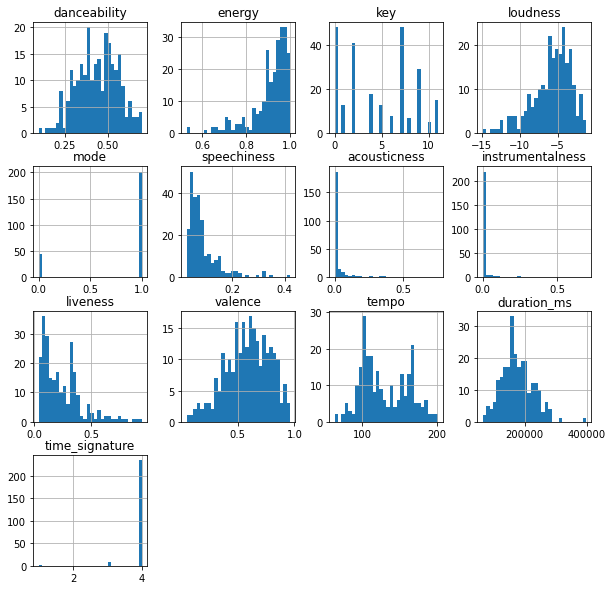

In [148]:
df.hist(bins=30, figsize=(10,10))

In [151]:
#we select the numeric columns
dfn=df.iloc[:,2:15]

In [152]:
dfn

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.312,0.942,5,-3.569,1,0.0690,0.001620,0.000000,0.6300,0.638,162.023,85480,3
1,0.283,0.723,11,-10.902,1,0.0365,0.369000,0.627000,0.1300,0.454,143.721,278987,4
2,0.510,0.828,11,-7.835,0,0.0433,0.007050,0.002690,0.2000,0.575,116.075,161613,4
3,0.417,0.972,0,-3.534,1,0.0794,0.000431,0.000000,0.7090,0.478,82.821,97867,4
4,0.522,0.768,7,-7.955,1,0.0289,0.024900,0.092900,0.1480,0.848,107.879,142000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.507,0.976,10,-4.482,0,0.0745,0.002740,0.000000,0.2230,0.522,102.496,120712,4
241,0.447,0.964,1,-3.031,1,0.0776,0.000018,0.000653,0.0658,0.478,137.025,168053,4
242,0.555,0.903,2,-6.118,1,0.0398,0.003160,0.000021,0.3580,0.607,110.991,164093,4
243,0.489,0.793,0,-14.883,1,0.0424,0.000742,0.002480,0.1660,0.662,97.967,208541,4


## scale and cluster

In [154]:
#we get the scaler
scaler=MinMaxScaler()

In [155]:
#fit the scaler to the data
scaler.fit(dfn)

MinMaxScaler()

In [159]:
#transform the data with the fited scaler
scaled_data=scaler.transform(dfn)

In [163]:
dfn.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [158]:
sdfn=0

In [164]:
sdfn=pd.DataFrame(scaled_data, columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'])

In [165]:
sdfn

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.358422,0.878465,0.454545,0.828864,1.0,0.105277,0.002144,0.000000,0.650066,0.645048,0.713916,0.062419,0.666667
1,0.310345,0.411514,1.000000,0.291648,1.0,0.022432,0.490036,0.899570,0.101580,0.443471,0.582473,0.642754,1.000000
2,0.686671,0.635394,1.000000,0.516337,0.0,0.039765,0.009355,0.003859,0.178368,0.576030,0.383923,0.290745,1.000000
3,0.532493,0.942431,0.000000,0.831429,1.0,0.131787,0.000565,0.000000,0.736727,0.469763,0.145096,0.099568,1.000000
4,0.706565,0.507463,0.636364,0.507546,1.0,0.003059,0.033061,0.133286,0.121325,0.875110,0.325060,0.231925,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.681698,0.950959,0.909091,0.761978,0.0,0.119296,0.003632,0.000000,0.203598,0.517967,0.286400,0.168081,1.000000
241,0.582228,0.925373,0.090909,0.868278,1.0,0.127199,0.000016,0.000937,0.031154,0.469763,0.534383,0.310059,1.000000
242,0.761273,0.795309,0.181818,0.642125,1.0,0.030844,0.004189,0.000030,0.351689,0.611087,0.347410,0.298183,1.000000
243,0.651857,0.560768,0.000000,0.000000,1.0,0.037471,0.000978,0.003558,0.141071,0.671341,0.253873,0.431484,1.000000


In [166]:
#sqr 244 -- 15
#lets make clusters with the songs

kmeans=KMeans(n_clusters=15, random_state=42)

In [167]:
cluster=kmeans.fit(sdfn)

In [170]:
cluster.labels_

array([ 6, 13,  2,  7, 10,  5,  4,  1, 13,  5,  1,  7,  4,  6,  3,  5,  4,
       12,  3,  1,  2,  6, 14,  1, 14,  4,  6,  4,  4,  4,  1,  1,  7,  4,
       14,  9,  3,  4,  2,  8,  4,  6,  1,  2,  6,  2,  2,  6,  5,  3, 13,
        6,  7, 10, 14,  2,  9,  0, 10,  0,  8,  7,  8,  6,  4,  2,  5,  2,
        7,  2,  8, 10,  4, 12,  0,  4,  5,  8, 14,  1, 12,  5,  4,  8,  6,
        8,  2, 14,  9,  6, 14,  6,  7,  3,  8,  8,  7,  7,  1,  4,  4,  4,
        1,  5,  2,  5, 10,  6, 14,  1, 12, 12,  8,  1,  5,  3,  3,  5,  8,
        7,  9,  5,  5,  5,  7,  4, 10, 14,  0,  5, 14,  0,  4,  5,  4,  8,
       11,  8,  6,  6,  2,  8,  2,  1,  4,  4,  5,  4,  4,  1,  1,  5,  4,
        1,  4,  1,  1, 10,  8,  6,  1,  6, 14,  6,  7,  3,  5,  4,  2, 14,
       12,  7,  7,  7,  8,  8,  8,  2,  4,  1,  1,  5,  5,  2,  1,  7,  2,
        7,  7, 12, 12,  2,  8,  5,  2,  0,  0,  8,  1,  3,  4,  4,  7,  7,
        1,  4,  4,  8,  3,  3, 11, 14,  8,  4,  7,  4,  1, 14,  4, 12, 14,
        6,  9,  1,  3,  6

In [214]:
df['cluster']= cluster.labels_

In [215]:
df

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,duration_ms,time_signature,type,id,uri,track_href,analysis_url,external_urls,cluster
0,Txus (En Directo) - Remastered,La Polla Records,0.312,0.942,5,-3.569,1,0.0690,0.001620,0.000000,...,162.023,85480,3,audio_features,4Ff4LlrBtxASEcvwC6ClsM,spotify:track:4Ff4LlrBtxASEcvwC6ClsM,https://api.spotify.com/v1/tracks/4Ff4LlrBtxAS...,https://api.spotify.com/v1/audio-analysis/4Ff4...,{'spotify': 'https://open.spotify.com/track/4F...,13
1,Ellos Dicen Mierda,La Polla Records,0.283,0.723,11,-10.902,1,0.0365,0.369000,0.627000,...,143.721,278987,4,audio_features,1pQvhzRnObih9msA91xDq7,spotify:track:1pQvhzRnObih9msA91xDq7,https://api.spotify.com/v1/tracks/1pQvhzRnObih...,https://api.spotify.com/v1/audio-analysis/1pQv...,{'spotify': 'https://open.spotify.com/track/4F...,15
2,"Que Turututu, Ay Que Tururu",La Polla Records,0.510,0.828,11,-7.835,0,0.0433,0.007050,0.002690,...,116.075,161613,4,audio_features,1eLWiukzQrnRn0Z6KhhHyz,spotify:track:1eLWiukzQrnRn0Z6KhhHyz,https://api.spotify.com/v1/tracks/1eLWiukzQrnR...,https://api.spotify.com/v1/audio-analysis/1eLW...,{'spotify': 'https://open.spotify.com/track/4F...,7
3,No Somos Nada (En Directo) - Remastered,La Polla Records,0.417,0.972,0,-3.534,1,0.0794,0.000431,0.000000,...,82.821,97867,4,audio_features,5MFNLUj5mGEfnSEt537HNW,spotify:track:5MFNLUj5mGEfnSEt537HNW,https://api.spotify.com/v1/tracks/5MFNLUj5mGEf...,https://api.spotify.com/v1/audio-analysis/5MFN...,{'spotify': 'https://open.spotify.com/track/4F...,16
4,Nadie Llorará Por Ti,La Polla Records,0.522,0.768,7,-7.955,1,0.0289,0.024900,0.092900,...,107.879,142000,4,audio_features,6PFGkjdnpznilcmfEZGpCM,spotify:track:6PFGkjdnpznilcmfEZGpCM,https://api.spotify.com/v1/tracks/6PFGkjdnpzni...,https://api.spotify.com/v1/audio-analysis/6PFG...,{'spotify': 'https://open.spotify.com/track/4F...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,El Pirri,Kostrosos,0.507,0.976,10,-4.482,0,0.0745,0.002740,0.000000,...,102.496,120712,4,audio_features,5EmVxDopHmn58kDdOgeHup,spotify:track:5EmVxDopHmn58kDdOgeHup,https://api.spotify.com/v1/tracks/5EmVxDopHmn5...,https://api.spotify.com/v1/audio-analysis/5EmV...,{'spotify': 'https://open.spotify.com/track/5N...,7
241,Tenéis Speed?,Rat-Zinger,0.447,0.964,1,-3.031,1,0.0776,0.000018,0.000653,...,137.025,168053,4,audio_features,1w0GUdlvwdpSoyqVb2Ofv7,spotify:track:1w0GUdlvwdpSoyqVb2Ofv7,https://api.spotify.com/v1/tracks/1w0GUdlvwdpS...,https://api.spotify.com/v1/audio-analysis/1w0G...,{'spotify': 'https://open.spotify.com/track/5N...,5
242,Dónde,K.O. Etíliko,0.555,0.903,2,-6.118,1,0.0398,0.003160,0.000021,...,110.991,164093,4,audio_features,0ztlhq7hP0TLpFjHuVTBol,spotify:track:0ztlhq7hP0TLpFjHuVTBol,https://api.spotify.com/v1/tracks/0ztlhq7hP0TL...,https://api.spotify.com/v1/audio-analysis/0ztl...,{'spotify': 'https://open.spotify.com/track/5N...,5
243,Tu Calor,Subversión X,0.489,0.793,0,-14.883,1,0.0424,0.000742,0.002480,...,97.967,208541,4,audio_features,0ZIH51wP3u1amW6IytOGW5,spotify:track:0ZIH51wP3u1amW6IytOGW5,https://api.spotify.com/v1/tracks/0ZIH51wP3u1a...,https://api.spotify.com/v1/audio-analysis/0ZIH...,{'spotify': 'https://open.spotify.com/track/5N...,12


## right number of clusters?

In [177]:
import numpy as np
import matplotlib.pyplot as plt

In [173]:
cluster.inertia_

52.74489821727271

In [183]:
#una funcion que va probando diferente numero de clusters y mira su inertia

K=range(8,45)
inertia=[]
for k in K:
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sdfn)
    inertia.append(kmeans.inertia_)


Text(0.5, 1.0, 'elbow method - finding the optimal k by inertia')

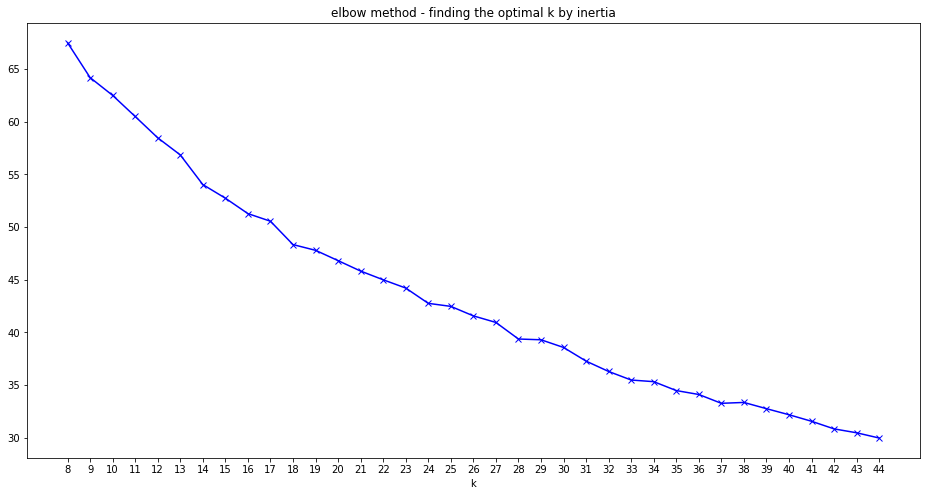

In [184]:
### plot the inertia -- metodo elbow

plt.figure(figsize=(16,8))
plt.plot(K,inertia,'bx-')
plt.xlabel('k')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method - finding the optimal k by inertia')

### we can try 18 or 24 or 28

In [186]:
#lets make clusters with the songs with the recomended number of clusters
#  18 clusters

kmeans=KMeans(n_clusters=18, random_state=42)

In [187]:
cluster=kmeans.fit(sdfn)

In [188]:
#drop the previous cluster column
df.drop('cluster', axis = 1, inplace = True)

In [189]:
#make a cluster column
df['cluster']= cluster.labels_

In [216]:
df

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,duration_ms,time_signature,type,id,uri,track_href,analysis_url,external_urls,cluster
0,Txus (En Directo) - Remastered,La Polla Records,0.312,0.942,5,-3.569,1,0.0690,0.001620,0.000000,...,162.023,85480,3,audio_features,4Ff4LlrBtxASEcvwC6ClsM,spotify:track:4Ff4LlrBtxASEcvwC6ClsM,https://api.spotify.com/v1/tracks/4Ff4LlrBtxAS...,https://api.spotify.com/v1/audio-analysis/4Ff4...,{'spotify': 'https://open.spotify.com/track/4F...,13
1,Ellos Dicen Mierda,La Polla Records,0.283,0.723,11,-10.902,1,0.0365,0.369000,0.627000,...,143.721,278987,4,audio_features,1pQvhzRnObih9msA91xDq7,spotify:track:1pQvhzRnObih9msA91xDq7,https://api.spotify.com/v1/tracks/1pQvhzRnObih...,https://api.spotify.com/v1/audio-analysis/1pQv...,{'spotify': 'https://open.spotify.com/track/4F...,15
2,"Que Turututu, Ay Que Tururu",La Polla Records,0.510,0.828,11,-7.835,0,0.0433,0.007050,0.002690,...,116.075,161613,4,audio_features,1eLWiukzQrnRn0Z6KhhHyz,spotify:track:1eLWiukzQrnRn0Z6KhhHyz,https://api.spotify.com/v1/tracks/1eLWiukzQrnR...,https://api.spotify.com/v1/audio-analysis/1eLW...,{'spotify': 'https://open.spotify.com/track/4F...,7
3,No Somos Nada (En Directo) - Remastered,La Polla Records,0.417,0.972,0,-3.534,1,0.0794,0.000431,0.000000,...,82.821,97867,4,audio_features,5MFNLUj5mGEfnSEt537HNW,spotify:track:5MFNLUj5mGEfnSEt537HNW,https://api.spotify.com/v1/tracks/5MFNLUj5mGEf...,https://api.spotify.com/v1/audio-analysis/5MFN...,{'spotify': 'https://open.spotify.com/track/4F...,16
4,Nadie Llorará Por Ti,La Polla Records,0.522,0.768,7,-7.955,1,0.0289,0.024900,0.092900,...,107.879,142000,4,audio_features,6PFGkjdnpznilcmfEZGpCM,spotify:track:6PFGkjdnpznilcmfEZGpCM,https://api.spotify.com/v1/tracks/6PFGkjdnpzni...,https://api.spotify.com/v1/audio-analysis/6PFG...,{'spotify': 'https://open.spotify.com/track/4F...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,El Pirri,Kostrosos,0.507,0.976,10,-4.482,0,0.0745,0.002740,0.000000,...,102.496,120712,4,audio_features,5EmVxDopHmn58kDdOgeHup,spotify:track:5EmVxDopHmn58kDdOgeHup,https://api.spotify.com/v1/tracks/5EmVxDopHmn5...,https://api.spotify.com/v1/audio-analysis/5EmV...,{'spotify': 'https://open.spotify.com/track/5N...,7
241,Tenéis Speed?,Rat-Zinger,0.447,0.964,1,-3.031,1,0.0776,0.000018,0.000653,...,137.025,168053,4,audio_features,1w0GUdlvwdpSoyqVb2Ofv7,spotify:track:1w0GUdlvwdpSoyqVb2Ofv7,https://api.spotify.com/v1/tracks/1w0GUdlvwdpS...,https://api.spotify.com/v1/audio-analysis/1w0G...,{'spotify': 'https://open.spotify.com/track/5N...,5
242,Dónde,K.O. Etíliko,0.555,0.903,2,-6.118,1,0.0398,0.003160,0.000021,...,110.991,164093,4,audio_features,0ztlhq7hP0TLpFjHuVTBol,spotify:track:0ztlhq7hP0TLpFjHuVTBol,https://api.spotify.com/v1/tracks/0ztlhq7hP0TL...,https://api.spotify.com/v1/audio-analysis/0ztl...,{'spotify': 'https://open.spotify.com/track/5N...,5
243,Tu Calor,Subversión X,0.489,0.793,0,-14.883,1,0.0424,0.000742,0.002480,...,97.967,208541,4,audio_features,0ZIH51wP3u1amW6IytOGW5,spotify:track:0ZIH51wP3u1amW6IytOGW5,https://api.spotify.com/v1/tracks/0ZIH51wP3u1a...,https://api.spotify.com/v1/audio-analysis/0ZIH...,{'spotify': 'https://open.spotify.com/track/5N...,12


In [191]:
#lets supose that this clustering is OK

# input and recomendation from the cluster

In [198]:
#input the id

#get id input
input_id=input('What is the id of your song? ').lstrip().rstrip()
if len(user_req)<2:
    print('Input to short, corto')
        
#ejemplo: 4Ff4LlrBtxASEcvwC6ClsM
#o otro: https://open.spotify.com/track/4wPGM9nZx5AECs48XFeWY8?si=f6be332082e14fcb

What is the id of your song? 4wPGM9nZx5AECs48XFeWY8


In [199]:
#get the AF of the input

AF_input=sp.audio_features(input_id)

In [205]:
AF_input

[{'danceability': 0.538,
  'energy': 0.696,
  'key': 7,
  'loudness': -12.12,
  'mode': 1,
  'speechiness': 0.0272,
  'acousticness': 0.0163,
  'instrumentalness': 0.344,
  'liveness': 0.078,
  'valence': 0.935,
  'tempo': 104.652,
  'type': 'audio_features',
  'id': '4wPGM9nZx5AECs48XFeWY8',
  'uri': 'spotify:track:4wPGM9nZx5AECs48XFeWY8',
  'track_href': 'https://api.spotify.com/v1/tracks/4wPGM9nZx5AECs48XFeWY8',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4wPGM9nZx5AECs48XFeWY8',
  'duration_ms': 112000,
  'time_signature': 4}]

In [217]:
#convertimos en data frame

inputdf=pd.DataFrame.from_dict(AF_input)

In [218]:
inputdf

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.538,0.696,7,-12.12,1,0.0272,0.0163,0.344,0.078,0.935,104.652,audio_features,4wPGM9nZx5AECs48XFeWY8,spotify:track:4wPGM9nZx5AECs48XFeWY8,https://api.spotify.com/v1/tracks/4wPGM9nZx5AE...,https://api.spotify.com/v1/audio-analysis/4wPG...,112000,4


In [219]:
#drop  columns not numerical

inputdf.drop(['type','id','uri','track_href','analysis_url'], axis = 1, inplace = True)

In [220]:
inputdf

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.538,0.696,7,-12.12,1,0.0272,0.0163,0.344,0.078,0.935,104.652,112000,4


In [221]:
# now we scale

#transform the data with the fited scaler
scaled_input=scaler.transform(inputdf)

In [222]:
#make the scaled input dtaframe
sindf=pd.DataFrame(scaled_input, columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'])

In [223]:
sindf

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.73309,0.353945,0.636364,0.202418,1.0,-0.001275,0.02164,0.493544,0.044537,0.970421,0.301884,0.141954,1.0


In [224]:
#now we try to determine the cluster of this song

kmeans.predict(sindf)

array([4])

In [227]:
inp_cluster=kmeans.predict(sindf)

In [229]:
inp_cluster[0]

4

### now we have the cluster of the input so we need to find a random song from the same cluster

In [234]:
import re
import random

In [244]:
selecteddf=df[df['cluster']==inp_cluster[0]]

In [245]:
selecteddf

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,duration_ms,time_signature,type,id,uri,track_href,analysis_url,external_urls,cluster
4,Nadie Llorará Por Ti,La Polla Records,0.522,0.768,7,-7.955,1,0.0289,0.024900,0.092900,...,107.879,142000,4,audio_features,6PFGkjdnpznilcmfEZGpCM,spotify:track:6PFGkjdnpznilcmfEZGpCM,https://api.spotify.com/v1/tracks/6PFGkjdnpzni...,https://api.spotify.com/v1/audio-analysis/6PFG...,{'spotify': 'https://open.spotify.com/track/4F...,4
53,El Mesías,Arpaviejas,0.537,0.780,5,-7.395,1,0.0369,0.000764,0.000000,...,100.132,193123,4,audio_features,6XhGmdyd3lJUJyUGaAuCqD,spotify:track:6XhGmdyd3lJUJyUGaAuCqD,https://api.spotify.com/v1/tracks/6XhGmdyd3lJU...,https://api.spotify.com/v1/audio-analysis/6XhG...,{'spotify': 'https://open.spotify.com/track/4F...,4
57,Mierda De Ciudad,Kortatu,0.522,0.644,2,-11.385,1,0.0534,0.223000,0.000000,...,154.978,197480,4,audio_features,6lSJZiZqWU8Qt1fJVeFZEv,spotify:track:6lSJZiZqWU8Qt1fJVeFZEv,https://api.spotify.com/v1/tracks/6lSJZiZqWU8Q...,https://api.spotify.com/v1/audio-analysis/6lSJ...,{'spotify': 'https://open.spotify.com/track/4F...,4
58,A La Calle,Kortatu,0.544,0.672,9,-12.861,1,0.0876,0.009270,0.000175,...,103.605,244987,4,audio_features,2tifYa1N1sWoWlpV7D8haA,spotify:track:2tifYa1N1sWoWlpV7D8haA,https://api.spotify.com/v1/tracks/2tifYa1N1sWo...,https://api.spotify.com/v1/audio-analysis/2tif...,{'spotify': 'https://open.spotify.com/track/4F...,4
59,La Linea del Frente,Kortatu,0.375,0.752,4,-8.294,1,0.0559,0.042100,0.000002,...,162.023,241560,4,audio_features,1EMaKyJCQIfPPRUEHdW3Wk,spotify:track:1EMaKyJCQIfPPRUEHdW3Wk,https://api.spotify.com/v1/tracks/1EMaKyJCQIfP...,https://api.spotify.com/v1/audio-analysis/1EMa...,{'spotify': 'https://open.spotify.com/track/4F...,4
71,Rock'n'roll,Cicatriz,0.618,0.707,7,-12.337,1,0.0613,0.000309,0.177000,...,117.904,82493,4,audio_features,1TOJwpeEGYEXaUmYDKDGwd,spotify:track:1TOJwpeEGYEXaUmYDKDGwd,https://api.spotify.com/v1/tracks/1TOJwpeEGYEX...,https://api.spotify.com/v1/audio-analysis/1TOJ...,{'spotify': 'https://open.spotify.com/track/4F...,4
74,Esto Saldra Bien,Cicatriz,0.488,0.533,7,-13.495,1,0.0443,0.000233,0.149000,...,156.346,228720,4,audio_features,4jtwFHIsFDuwTfqfMyCOUi,spotify:track:4jtwFHIsFDuwTfqfMyCOUi,https://api.spotify.com/v1/tracks/4jtwFHIsFDuw...,https://api.spotify.com/v1/audio-analysis/4jtw...,{'spotify': 'https://open.spotify.com/track/4F...,4
106,Rompiste a Gritar,Kutxillo,0.648,0.726,7,-9.699,1,0.1150,0.013700,0.000000,...,95.957,180000,4,audio_features,3sKHQsHAg4ItYgGrSTxZWk,spotify:track:3sKHQsHAg4ItYgGrSTxZWk,https://api.spotify.com/v1/tracks/3sKHQsHAg4It...,https://api.spotify.com/v1/audio-analysis/3sKH...,{'spotify': 'https://open.spotify.com/track/4U...,4
126,Otra vez en tus manos,Gérmenes,0.628,0.791,8,-10.733,1,0.0817,0.006650,0.000221,...,93.915,153320,4,audio_features,0rkA6mYXcoAkrJ995LMQnC,spotify:track:0rkA6mYXcoAkrJ995LMQnC,https://api.spotify.com/v1/tracks/0rkA6mYXcoAk...,https://api.spotify.com/v1/audio-analysis/0rkA...,{'spotify': 'https://open.spotify.com/track/4U...,4
157,Somos Nada,Distorsión,0.578,0.838,7,-8.704,1,0.0315,0.016200,0.000318,...,101.625,102059,4,audio_features,1pm6ekbXyrvlYjpNfQta12,spotify:track:1pm6ekbXyrvlYjpNfQta12,https://api.spotify.com/v1/tracks/1pm6ekbXyrvl...,https://api.spotify.com/v1/audio-analysis/1pm6...,{'spotify': 'https://open.spotify.com/track/4U...,4


In [246]:
#geting the length automatically
len(selecteddf.index)

10

In [249]:
selecteddf.iloc[2,0]

'Mierda De Ciudad'

In [250]:
#pick a random song etc

rnd=random.randint(0, len(selecteddf.index)-1)

print(rnd)

song_recom=selecteddf.iloc[rnd,0]
artist_recom=selecteddf.iloc[rnd,1]
eurl_recom=selecteddf.iloc[rnd,-2]


8


In [251]:
song_recom

'Otra vez en tus manos'

In [252]:

print(song_recom)
print(artist_recom)
print(eurl_recom)

Otra vez en tus manos
Gérmenes
{'spotify': 'https://open.spotify.com/track/4UjqoyfmarLo3Ub3LE19eC'}
